<a href="https://colab.research.google.com/github/Locojuan9/se-ales_y_sistemas/blob/main/Parciales/Parcial1_Juan_Alejandro_Villodres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se tiene un microprocesador de 3 bits con entrada análoga de -5 a 5 [V]. Diseñe el sistema de acondicionamiento y digitalización para la señal:

\begin{equation}
x(t)=7\text{sen(4t - π/2)}-2\text{cos(5t)}+2\text{cos(10t)}
\end{equation}

**Solución**

---


Empezamos importando las librerías

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

Creamos las funciones de "cero y pendiente" y "Conversor a señal digital"

In [10]:
def slope_offset(x: any, ymin: float, ymax: float):
    xmax = max(x)
    xmin = min(x)

    slope = (ymax - ymin) / (xmax - xmin)
    offset = ymin - (slope * xmin)

    y = (slope * x) + offset
    return y

def digital_conv(bits: int, ymin: int, ymax: int, y: any):
    states = np.linspace(ymin, ymax, 2**bits)
    d = cdist(y.reshape(-1, 1), states.reshape(-1, 1))
    ind = np.argmin(d, axis=1)
    return states[ind]

Declaramos nuestra señal y sus datos importantes

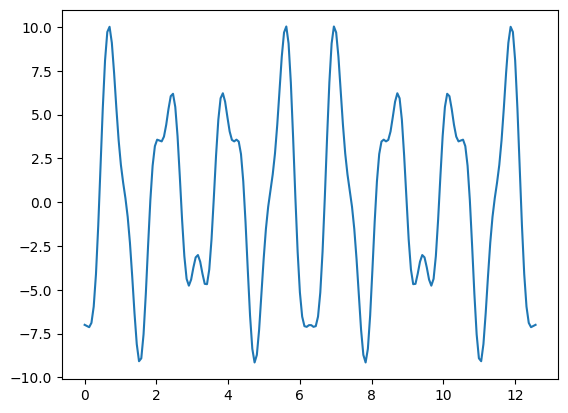

In [21]:
bits = 3 # Bits del conversor
ymin = -5 # Rango mínimo del voltaje
ymax = 5 # Rango máximo del voltaje

To = 2*np.pi # Periodo de la señal
Fo = 1/To # Frecuencia de la señal
Fs = 10*Fo # Frecuencia de muestreo de la señal, cumpliendo Nysguit
Ts = 1/Fs # Periodo de muestreo de la señal

tv = np.linspace(0, 2*To, 200) # Arreglo de 200 muestras equiespaciadas
y = 7 * np.sin(4*tv - np.pi/2) - 2 * np.cos(5*tv) + 2 * np.cos(10*tv) # Señal

plt.plot(tv, y) # Plot de la señal
plt.show()

Calculamos el cero y pendiente

In [12]:
yso = slope_offset(y, -5, 5)

Hacemos el proceso de digitalización de la señal

In [13]:
for i in range(yso.shape[0]):
    if i == 0:
        ydgt = digital_conv(3, -5, 5, yso[i])
    else:
        ydgt = np.append(ydgt, digital_conv(3, -5, 5, yso[i]))

Creamos el plot para las líneas que demarcan la digitalización y ploteamos el resultado

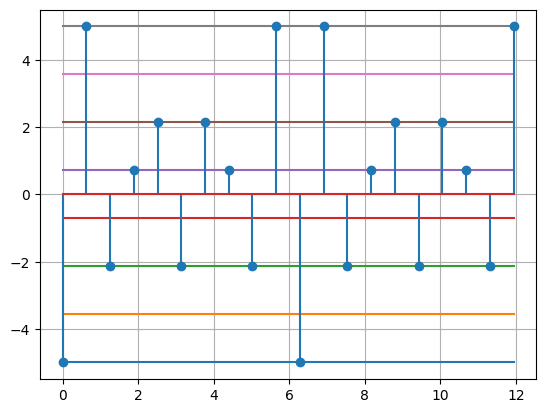

In [16]:
for v in np.linspace(-5, 5, 2**3):
    plt.plot(tv, v*np.ones(len(tv)))

plt.stem(tv, ydgt)
plt.grid()
plt.show()